## Libraries & Settings

- **pandas** → work with tables (DataFrames)
- **NumPy** → do calculations and handle numbers
- **Matplotlib** → create basic charts
- **Seaborn** → create better-looking charts


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load & Preview Dataset

- Load the CSV file into a DataFrame
- Store the data in variable `df`
- Display the first few rows to understand the data structure


In [4]:
file_path = '../data/dirty_cafe_sales.csv'
df = pd.read_csv(file_path)
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


## Dataset size
- Shows total number of rows and columns in the dataset
- helps understand how big the data is

In [4]:
df.shape

(10000, 8)

## Dataset Information
- Shows Column names and data types
- displays number of non-null values
- helps identify missing values and data issues

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


## Summary of Non-Numeric Columns (this dataset doesn't have numeric column)

- **count** → number of non-empty values
- **unique** → number of unique values
- **top** → most frequent value
- **freq** → frequency of the most frequent value
- Helps understand categorical data and identify common categories


In [6]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


## Check Missing Values

- `isnull().sum()` shows how many missing (empty) values are in each column  
- Helps identify columns that need cleaning or filling


In [7]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

## Check Duplicate Rows

- `duplicated().sum()` shows the number of duplicate rows in the dataset  
- Helps identify repeated entries that may need to be removed


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


### Inspection of Numeric-Intended Columns

Unique values in the numeric-intended columns show some issues:

1. **Quantity**:
   - Numbers are stored as strings: `'1', '2', '3', ...`
   - Invalid values: `'ERROR', 'UNKNOWN'`
   - Missing values: `NaN`

2. **Price Per Unit**:
   - Decimal numbers stored as strings: `'1.5', '2.0', ...`
   - Invalid values: `'ERROR', 'UNKNOWN'`
   - Missing values: `NaN`

3. **Total Spent**:
   - Decimal numbers stored as strings: `'4.0', '12.0', ...`
   - Invalid values: `'ERROR', 'UNKNOWN'`
   - Missing values: `NaN`

**Conclusion:**  
To clean these columns, we need to:
- Replace invalid/fake missing values (`'ERROR', 'UNKNOWN'`) with `NaN`  
- Convert them to numeric types (`int` for Quantity, `float` for Price Per Unit and Total Spent)  

These steps will ensure the columns can be used for calculations, analysis, and visualizations.


In [10]:
df['Quantity'].unique()[:20]

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [11]:
df['Price Per Unit'].unique()[:20]


array(['2.0', '3.0', '1.0', '5.0', '4.0', '1.5', nan, 'ERROR', 'UNKNOWN'],
      dtype=object)

In [12]:
df['Total Spent'].unique()[:20]

array(['4.0', '12.0', 'ERROR', '10.0', '20.0', '9.0', '16.0', '15.0',
       '25.0', '8.0', '5.0', '3.0', '6.0', nan, 'UNKNOWN', '2.0', '1.0',
       '7.5', '4.5', '1.5'], dtype=object)

### Inspection of Categorical Columns

1. **Payment Method**:
   - Valid values: `Digital Wallet`, `Credit Card`, `Cash`
   - Invalid/fake missing values: `'ERROR', 'UNKNOWN'`
   - Missing values: `NaN`

2. **Location**:
   - Valid values: `Takeaway`, `In-store`
   - Invalid/fake missing values: `'ERROR', 'UNKNOWN'`
   - Missing values: `NaN`

**Conclusion:**  
Both categorical columns require:
- Replacement of invalid/fake missing values with `NaN`
- Standardization of categories for analysis


In [13]:
df['Payment Method'].value_counts(dropna=False)


Payment Method
NaN               2579
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: count, dtype: int64

In [14]:
df['Location'].value_counts(dropna=False)

Location
NaN         3265
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: count, dtype: int64

## Handling Invalid/Fake Missing Values

From exploration, several columns contain invalid placeholders representing missing data:
- `"ERROR"`  
- `"UNKNOWN"`

These appear in both numeric and categorical columns.  

**Objective:**  
- Standardize all invalid/fake missing values to `NaN`  
- This makes it easier to handle missing data consistently in the next steps.


In [15]:
# List of invalid/fake missing values
invalid_values = ['ERROR', 'UNKNOWN']

# Replace invalid values with NaN in the entire DataFrame
df.replace(invalid_values, pd.NA, inplace=True)

# Check first 10 rows to confirm changes
df.head(10)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,<NA>,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,<NA>,<NA>,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,<NA>,3,3.0,9.0,<NA>,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,<NA>,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


## Converting Numeric Columns to Correct Data Types

From our inspection, the numeric-intended columns (`Quantity`, `Price Per Unit`, `Total Spent`) are stored as strings.  
They also contain missing values (`<NA>`).  

**Objective:**  
- Convert `Quantity` to integers  
- Convert `Price Per Unit` and `Total Spent` to floats  
- Ensure missing values remain properly handled


In [16]:
# Convert Quantity to integer (nullable type 'Int64')
df['Quantity'] = df['Quantity'].astype('Int64')

# Convert Price Per Unit and Total Spent to float (nullable type 'Float64')
df['Price Per Unit'] = df['Price Per Unit'].astype('Float64')
df['Total Spent'] = df['Total Spent'].astype('Float64')

# Check dtypes to confirm
df.dtypes


Transaction ID       object
Item                 object
Quantity              Int64
Price Per Unit      Float64
Total Spent         Float64
Payment Method       object
Location             object
Transaction Date     object
dtype: object

## Convert Transaction Date to Datetime

- The `Transaction Date` column is currently a string (object).  
- To analyze by date, we need to convert it to Pandas `datetime`.  
- This allows us to extract year, month, day, and perform date-based calculations.


In [17]:
# Convert Transaction Date to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# Check the first 5 rows and dtype
df['Transaction Date'].head(), df['Transaction Date'].dtype


(0   2023-09-08
 1   2023-05-16
 2   2023-07-19
 3   2023-04-27
 4   2023-06-11
 Name: Transaction Date, dtype: datetime64[ns],
 dtype('<M8[ns]'))

In [18]:
df.isnull().sum()

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

## Extract Year, Month, and Weekday from Transaction Date

- We can create new columns for `Year`, `Month`, and `Weekday` from the `Transaction Date`.
- This helps in:
  - Analyzing sales trends over months or years
  - Checking which days of the week have higher sales
  - Easy grouping and visualization


In [19]:
# Extract Year, Month, and Weekday
df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['Weekday'] = df['Transaction Date'].dt.day_name()  # gives Monday, Tuesday, etc.

# Check the first 10 rows to see new columns
df[['Transaction Date', 'Year', 'Month', 'Weekday']].head(10)


,Transaction Date,Year,Month,Weekday
0,2023-09-08,2023.0,9.0,Friday
1,2023-05-16,2023.0,5.0,Tuesday
2,2023-07-19,2023.0,7.0,Wednesday
3,2023-04-27,2023.0,4.0,Thursday
4,2023-06-11,2023.0,6.0,Sunday
5,2023-03-31,2023.0,3.0,Friday
6,2023-10-06,2023.0,10.0,Friday
7,2023-10-28,2023.0,10.0,Saturday
8,2023-07-28,2023.0,7.0,Friday
9,2023-12-31,2023.0,12.0,Sunday


## Step 2.5: Outlier Detection

- Outliers are extreme values that differ significantly from other observations.
- They can distort statistics like mean, and affect missing value imputation.
- We'll use **boxplots** to visually detect outliers in numeric columns:
  - Quantity
  - Price Per Unit
  - Total Spent


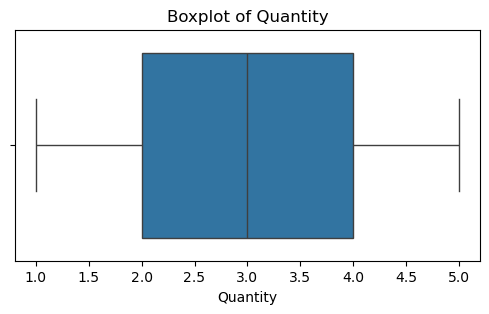

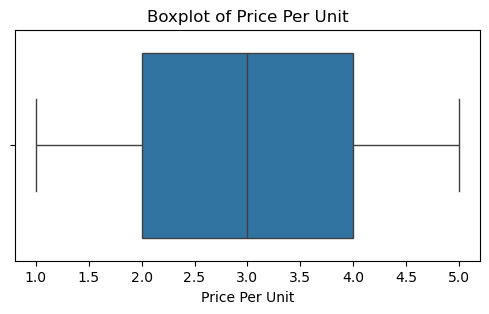

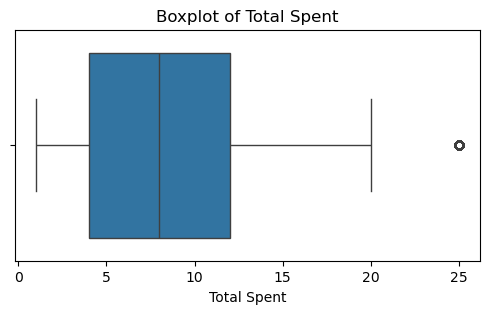

In [20]:
# Numeric columns to check
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

# Plot boxplots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### Filling Missing Values in Numerical Columns (After Outlier Check)

1. `df['Quantity']` selects the **Quantity** column.  
   - `median()` calculates the **middle value** of the data.  
   - `fillna()` replaces missing values with the median.  
   - Median is used to **reduce the effect of outliers** and preserve integer consistency.
    
2. `df['Price Per Unit']` selects the **Price Per Unit** column.  
   - `mean()` calculates the **average value**.  
   - `fillna()` replaces missing values with the mean.  
   - Mean is suitable when data is **fairly evenly distributed** and no extreme outliers are present.

3. `df['Total Spent']` selects the **Total Spent** column.  
   - `median()` calculates the **middle value**, ignoring the effect of extreme outliers.  
   - `fillna()` replaces missing values with this median.  
   - Median is safer here because we detected **one outlier** in Total Spent.

This approach ensures **all numerical columns are free from missing values**, while keeping the data **robust and realistic** for analysis.


In [21]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].mean())
df['Total Spent'] = df['Total Spent'].fillna(df['Total Spent'].median())

### Filling Missing Values Using Mode (Most Common Value)

- `df['Item']` selects the **Item** column.
- `mode()` finds the **most frequently occurring value** in the column.
- `[0]` selects the **first (most common) mode**.
- `fillna()` replaces all **missing (NaN) values** with that most common value.

This approach is used for **categorical (text) data** to keep the dataset complete and consistent.


In [22]:
df['Item'] = df['Item'].fillna(df['Item'].mode()[0])
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])


In [23]:
df.isnull().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    460
Year                460
Month               460
Weekday             460
dtype: int64

## Exploratory Data Analysis (EDA)

- Goal: Understand the dataset, detect patterns, and find insights.
- Focus:
  1. Numeric columns → distributions, relationships
  2. Categorical columns → counts, popular items, payment methods
  3. Time-based analysis → monthly, weekday sales trends


### Numeric Column Analysis
-Distribution of Quantity, Price, Total Spend

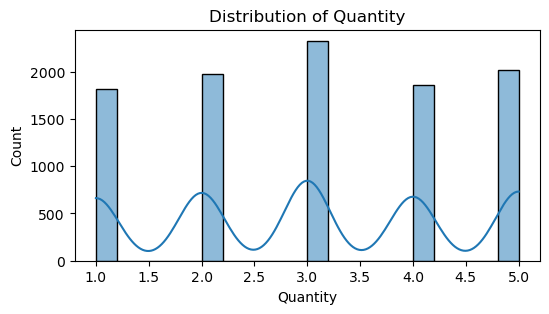

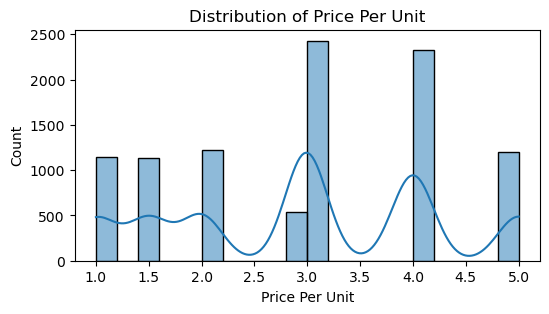

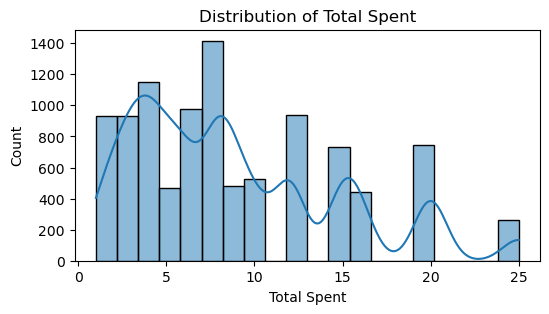

In [25]:
# Histograms for numeric columns
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()


In [26]:
df.shape


(10000, 11)

In [27]:
df.head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Year,Month,Weekday
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,2023.0,9.0,Friday
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,2023.0,5.0,Tuesday
2,TXN_4271903,Cookie,4,1.0,8.0,Credit Card,In-store,2023-07-19,2023.0,7.0,Wednesday
3,TXN_7034554,Salad,2,5.0,10.0,Digital Wallet,Takeaway,2023-04-27,2023.0,4.0,Thursday
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,2023.0,6.0,Sunday


### most sold item:

In [30]:
df['Item'].value_counts().head(10)


Item
Juice       2140
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
Name: count, dtype: int64

### Sales by Month:

In [32]:
df.groupby('Month')['Total Spent'].sum()

Month
1.0     7221.0
2.0     6584.0
3.0     7198.0
4.0     7138.5
5.0     6970.0
6.0     7327.5
7.0     6910.0
8.0     7112.0
9.0     6829.5
10.0    7336.5
11.0    6884.5
12.0    7097.0
Name: Total Spent, dtype: Float64

### Payment Method Popularity:

In [33]:
df['Payment Method'].value_counts()


Payment Method
Digital Wallet    5469
Credit Card       2273
Cash              2258
Name: count, dtype: int64

### Location-wise Spending:

In [34]:
df.groupby('Location')['Total Spent'].sum()


Location
In-store    27090.0
Takeaway    61689.5
Name: Total Spent, dtype: Float64

<Axes: xlabel='Month'>

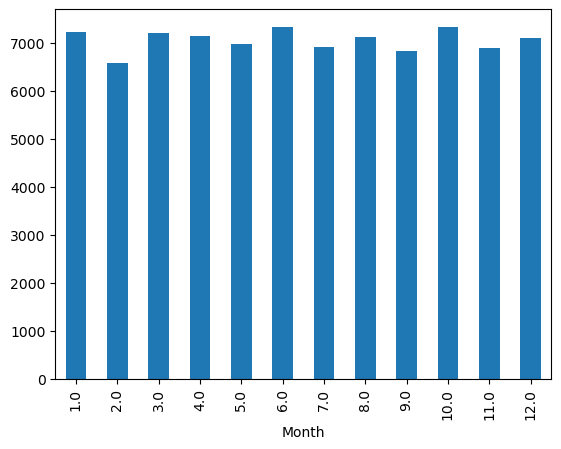

In [37]:
df.groupby('Month')['Total Spent'].sum().plot(kind='bar')